# Pull data from Hybrid-Analysis using their API and make a model to predict whether traffic is malicious or no

### conda install requests

In [7]:
import requests
import json

### Set headers for the API request

In [8]:
parameters = {
    "api-key": "s3vwbiju16f29800tnrm7m1o11d8af609qpen4wg539481160qg3q7rh3c96aabc",
    "accept-encoding" : "gzip",
    "user-agent" : "Falcon Sandbox"
}

### Pull from feed

In [9]:
response = requests.get("https://www.hybrid-analysis.com/feed?json", headers=parameters)
## log out the return code and any headers - not required for this problem but useful
print("response code: ", response.status_code, "content length is ", len(response.content))
print("headers: ", json.dumps(response.headers.__dict__, sort_keys=True, indent=4))

response code:  200 content length is  2237025
headers:  {
    "_store": {
        "access-control-allow-origin": [
            "Access-Control-Allow-Origin",
            "*"
        ],
        "cache-control": [
            "Cache-Control",
            "max-age=0, private, must-revalidate, max-age=2592000"
        ],
        "cf-cache-status": [
            "CF-Cache-Status",
            "DYNAMIC"
        ],
        "cf-ray": [
            "CF-RAY",
            "6481f73dbbf82717-DEN"
        ],
        "cf-request-id": [
            "cf-request-id",
            "09c518da95000027172cb5a000000001"
        ],
        "connection": [
            "Connection",
            "keep-alive"
        ],
        "content-encoding": [
            "Content-Encoding",
            "gzip"
        ],
        "content-security-policy": [
            "Content-Security-Policy",
            "default-src 'none'; connect-src 'self' *.twitter.com; script-src 'self' *.google.com *.gstatic.com *.google-analytics.

In [10]:
json_response = response.json()
datasets = json_response['data']
print(datasets)

[{'md5': '158088db8f1a30df04ea6169dc7886f7', 'sha1': '96a239ab7aa7c01688676ecd643964bbfff670ff', 'sha256': 'a73edd8b3aeac44694848eae8dc01bd64c0a0c46be30a5b809370670e83fce34', 'isunknown': True, 'isinteresting': False, 'analysis_start_time': '2021-04-30 15:47:06', 'threatscore': 17, 'threatlevel': 0, 'threatlevel_human': 'no specific threat', 'environmentId': '100', 'environmentDescription': 'Windows 7 32 bit', 'sharedanalysis': False, 'isreliable': True, 'reporturl': '/sample/a73edd8b3aeac44694848eae8dc01bd64c0a0c46be30a5b809370670e83fce34/608c2679239cfa5e193997bf', 'process_list': [{'uid': '00064225-00003044', 'name': 'iexplore.exe', 'normalizedpath': '%PROGRAMFILES%\\Internet Explorer\\iexplore.exe', 'commandline': 'C:\\a73edd8b3aeac44694848eae8dc01bd64c0a0c46be30a5b809370670e83fce34_1619797622877_part-002.html', 'sha256': '8abc7daa81c8a20bfd88b6a60ecc9ed1292fbb6cedbd6f872f36512d9a194bba'}, {'uid': '00064445-00003280', 'parentuid': '00064225-00003044', 'name': 'iexplore.exe', 'normal

In [11]:
json_response = response.json()
datasets = json_response['data']
print (len(datasets))
print ("first one is of type ", type(datasets[0]))
#print ("first one is ", datasets[0])
print (datasets[0].keys())
print()
#print ("first one is ", json.dumps(datasets[0], sort_keys=True, indent=4))
print ("is interesting: ", datasets[0].get("isinteresting"), " threatscore:", datasets[0].get("threatscore"), "reporturl: ", datasets[0].get("reporturl"), " sha256:", datasets[0].get("sha256"))

127
first one is of type  <class 'dict'>
dict_keys(['md5', 'sha1', 'sha256', 'isunknown', 'isinteresting', 'analysis_start_time', 'threatscore', 'threatlevel', 'threatlevel_human', 'environmentId', 'environmentDescription', 'sharedanalysis', 'isreliable', 'reporturl', 'process_list', 'extracted_files', 'ssdeep'])

is interesting:  False  threatscore: 17 reporturl:  /sample/a73edd8b3aeac44694848eae8dc01bd64c0a0c46be30a5b809370670e83fce34/608c2679239cfa5e193997bf  sha256: a73edd8b3aeac44694848eae8dc01bd64c0a0c46be30a5b809370670e83fce34


### This for loop is just practice for a similar for loop later on. Not used in model

In [12]:
for aThing in datasets:
    print ("is interesting: ", aThing.get("isinteresting"), " threatscore:", aThing.get("threatscore"),  " reporturl:", aThing.get("reporturl"),  " sha256:", aThing.get("sha256"))

is interesting:  False  threatscore: 17  reporturl: /sample/a73edd8b3aeac44694848eae8dc01bd64c0a0c46be30a5b809370670e83fce34/608c2679239cfa5e193997bf  sha256: a73edd8b3aeac44694848eae8dc01bd64c0a0c46be30a5b809370670e83fce34
is interesting:  False  threatscore: 12  reporturl: /sample/4a161430c2c555f97e9fc2ae692dee184c153c198d0684650bccf5589eca16d9/608c262b8f95e606eb695af2  sha256: 4a161430c2c555f97e9fc2ae692dee184c153c198d0684650bccf5589eca16d9
is interesting:  False  threatscore: 7  reporturl: /sample/e9be5902a20e3495abf0fbf9611e7087f7d7fab4c2135d88f1d823a5e2a5a06c/608c262b7536651d911bfcfd  sha256: e9be5902a20e3495abf0fbf9611e7087f7d7fab4c2135d88f1d823a5e2a5a06c
is interesting:  False  threatscore: 0  reporturl: /sample/397192924d6adece9887ad7646371eb6efa169ba72464afa87299a48d82fd8c5/608c2620ae567b46e035997a  sha256: 397192924d6adece9887ad7646371eb6efa169ba72464afa87299a48d82fd8c5
is interesting:  False  threatscore: 13  reporturl: /sample/13931ee520f4775433edcb1edacafb1a2711d8cf8a9377

### Format the data into a dataframe

In [13]:
import pandas as pd
df = pd.DataFrame(datasets)
df

,md5,sha1,sha256,isunknown,isinteresting,analysis_start_time,threatscore,threatlevel,threatlevel_human,environmentId,...,vt_detect,ms_detect,size,type,domains_capped,hosts_capped,et_alerts_total,et_alerts_real_total,et_alerts,associated_email_headers
0,158088db8f1a30df04ea6169dc7886f7,96a239ab7aa7c01688676ecd643964bbfff670ff,a73edd8b3aeac44694848eae8dc01bd64c0a0c46be30a5...,True,False,2021-04-30 15:47:06,17,0,no specific threat,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7c76c0a8f4aad9e5da29b953e546f290,5a351dc3196f88438dd339adf89ee2ec235d0aee,4a161430c2c555f97e9fc2ae692dee184c153c198d0684...,True,False,2021-04-30 15:45:48,12,0,no specific threat,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c7f324c73c3a07309757655b4255cb65,8e77bb03a0cced655a368528c9a7bfb2bf83ab0a,e9be5902a20e3495abf0fbf9611e7087f7d7fab4c2135d...,True,False,2021-04-30 15:45:48,7,0,no specific threat,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b45b2af3b595bf61d3532e0b3d081da7,cf9dd2a94cf7abe5e758741ede8566bd4876112c,397192924d6adece9887ad7646371eb6efa169ba72464a...,True,False,2021-04-30 15:45:44,0,0,no specific threat,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55e368ed6d327dfa77429a64a6365452,4b4931dd9cb8f970e8fbc3fa16da6286a7a6961c,13931ee520f4775433edcb1edacafb1a2711d8cf8a9377...,True,False,2021-04-30 15:44:42,13,0,no specific threat,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,3f3d92fccac4a2a4a070915167c887b3,ad93b19b95038c167fccf0bb16a2f61aed0b2489,732cc4fff52e744c106f4dd55de4f405eb2879c6150637...,False,False,2021-04-30 15:13:01,47,1,suspicious,100,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,b77f5247360b9dd2b293523422649198,85626f8106d5167df8d09585bebf811dba73e699,e588c40227a981c2e17f9b9252d5c0e6552e4350813438...,False,True,2021-04-30 15:12:47,100,2,malicious,120,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,e75aa3c40bac9d6c603afa406ef0bdc0,2381c06b0115fd887e9922f81c26647c4bd6c01f,d5b2b3a6ff5e17677c923e1e36fbd0a114207ca9b81f4f...,False,False,2021-04-30 15:12:42,28,0,no specific threat,120,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,f030c64a45f610fd06ab0f5d1a7595dd,d79e720e90815204ba0cb06bb398dbabb8f0fa12,6b39686b14a4437c6e41c8500106ced714e8a221a3831b...,True,False,2021-04-30 15:12:41,17,0,no specific threat,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Look at the reporturl column to see how we need to split it up so we can put the values in a for loop to pull each individual report

In [14]:
df["reporturl"]

0      /sample/a73edd8b3aeac44694848eae8dc01bd64c0a0c...
1      /sample/4a161430c2c555f97e9fc2ae692dee184c153c...
2      /sample/e9be5902a20e3495abf0fbf9611e7087f7d7fa...
3      /sample/397192924d6adece9887ad7646371eb6efa169...
4      /sample/13931ee520f4775433edcb1edacafb1a2711d8...
                             ...                        
122    /sample/732cc4fff52e744c106f4dd55de4f405eb2879...
123    /sample/e588c40227a981c2e17f9b9252d5c0e6552e43...
124    /sample/d5b2b3a6ff5e17677c923e1e36fbd0a114207c...
125    /sample/6b39686b14a4437c6e41c8500106ced714e8a2...
126    /sample/e588c40227a981c2e17f9b9252d5c0e6552e43...
Name: reporturl, Length: 127, dtype: object

### Split the report url to seperate out jobid

In [15]:
#Filter out /sample/ from reporturl column
df["jobid"]=df["reporturl"].str.split("/", expand=True)[3]
list(df)

['md5',
 'sha1',
 'sha256',
 'isunknown',
 'isinteresting',
 'analysis_start_time',
 'threatscore',
 'threatlevel',
 'threatlevel_human',
 'environmentId',
 'environmentDescription',
 'sharedanalysis',
 'isreliable',
 'reporturl',
 'process_list',
 'extracted_files',
 'ssdeep',
 'submitname',
 'isurlanalysis',
 'domains',
 'hosts',
 'hosts_geo',
 'tags',
 'avdetect',
 'vxfamily',
 'compromised_hosts',
 'vt_detect',
 'ms_detect',
 'size',
 'type',
 'domains_capped',
 'hosts_capped',
 'et_alerts_total',
 'et_alerts_real_total',
 'et_alerts',
 'associated_email_headers',
 'jobid']

### Combine url with job id so we can insert into for loop to pull all the matching reports from the feed.

In [16]:
df["url"]= "https://www.hybrid-analysis.com/api/v2/report/"+df["jobid"]+"/summary"
df["url"]

0      https://www.hybrid-analysis.com/api/v2/report/...
1      https://www.hybrid-analysis.com/api/v2/report/...
2      https://www.hybrid-analysis.com/api/v2/report/...
3      https://www.hybrid-analysis.com/api/v2/report/...
4      https://www.hybrid-analysis.com/api/v2/report/...
                             ...                        
122    https://www.hybrid-analysis.com/api/v2/report/...
123    https://www.hybrid-analysis.com/api/v2/report/...
124    https://www.hybrid-analysis.com/api/v2/report/...
125    https://www.hybrid-analysis.com/api/v2/report/...
126    https://www.hybrid-analysis.com/api/v2/report/...
Name: url, Length: 127, dtype: object

### DO NOT USE THIS ONE: Use api to pull report summary data 

In [17]:
#for index, row in df.iterrows():
    ## log out the return code and any headers - not required for this problem but useful
    #print(row["url"])
    #response = requests.get(row["url"], headers=parameters)
    #print("response code: ", response.status_code, "content length is ", len(response.content))
    #print("headers: ", json.dumps(response.headers.__dict__, sort_keys=True, indent=4))
    #json_response = response.json()
    #report = json_response['data']
    #print(json_response)
    
    #df.at[index,"summary"] = json_response

### This call puts the json data and puts it into a new "summary" column

In [18]:
def get_summary(row):
    #print(row)
    response = requests.get(row["url"], headers=parameters)
    print("response code: ", response.status_code, "content length is ", len(response.content))
    #print("headers: ", json.dumps(response.headers.__dict__, sort_keys=True, indent=4))
    json_response = response.json()
    #report = json_response['data']
    #print(json_response)
    
    return json_response
    
df["summary"] = df.apply(get_summary, axis = 1)

response code:  200 content length is  7756
response code:  200 content length is  12842
response code:  200 content length is  14146
response code:  200 content length is  1371
response code:  200 content length is  32715
response code:  200 content length is  32327
response code:  200 content length is  2692
response code:  200 content length is  34129
response code:  200 content length is  9496
response code:  200 content length is  30983
response code:  200 content length is  31351
response code:  200 content length is  30864
response code:  200 content length is  8421
response code:  200 content length is  6891
response code:  200 content length is  9906
response code:  200 content length is  31137
response code:  200 content length is  29854
response code:  200 content length is  30846
response code:  200 content length is  12867
response code:  200 content length is  30064
response code:  200 content length is  12736
response code:  200 content length is  9278
response code:  20

### Make sure it worked and added the new summary column

In [19]:
df["summary"]

0      {'job_id': '608c2679239cfa5e193997bf', 'enviro...
1      {'job_id': '608c262b8f95e606eb695af2', 'enviro...
2      {'job_id': '608c262b7536651d911bfcfd', 'enviro...
3      {'job_id': '608c2620ae567b46e035997a', 'enviro...
4      {'job_id': '608c25e53657ab1e3f604f2e', 'enviro...
                             ...                        
122    {'job_id': '608c1e7a5434a9387b3c64ac', 'enviro...
123    {'job_id': '608c1e6ef64b1847a07f66df', 'enviro...
124    {'job_id': '608c1e67ebf2553fec29da6c', 'enviro...
125    {'job_id': '608c1e6881cf1c65d4611de6', 'enviro...
126    {'job_id': '608c1e62da9ed2787d351bd9', 'enviro...
Name: summary, Length: 127, dtype: object

### Just checking the summary column type

In [20]:
print(type(df["summary"]))
print(df["summary"].dtypes)

<class 'pandas.core.series.Series'>
object


### This makes sure no failed reports are included. Aka if we run out of daily requests those aren't added into the dataframe. The block below shows the length of each summary.

In [21]:
df['sum_len'] = df['summary'].str.len()
print(df['sum_len'])

0      41
1      41
2      41
3      41
4      41
       ..
122    41
123    41
124    41
125    41
126    41
Name: sum_len, Length: 127, dtype: int64


### This block gets rid of all the summary's that didn't come through. their length is less than 2

In [22]:
df = df[df.sum_len > 2]
print(df['sum_len'])

0      41
1      41
2      41
3      41
4      41
       ..
122    41
123    41
124    41
125    41
126    41
Name: sum_len, Length: 127, dtype: int64


### Create function to make a new row counting the number of mitre attacks

In [23]:
#for index, row in df.iterrows():
    # log out the return code and any headers - not required for this problem but useful
    #print(len(row["summary"]["mitre_attcks"]))
    
def get_num_mitre_attcks(row):
    return len(row["summary"]["mitre_attcks"])

    
df["num_mitre_attcks"] = df.apply(get_num_mitre_attcks, axis = 1)
print(df['num_mitre_attcks'])

0      0
1      0
2      0
3      0
4      0
      ..
122    6
123    4
124    0
125    0
126    4
Name: num_mitre_attcks, Length: 127, dtype: int64


# Model Building
### Import needed packages

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline
plt.style.use('ggplot')
import warnings; warnings.simplefilter('ignore')

# Make a copy of df. We can only access so many pulls in one day from the api so it is imperitive to work "offline" to keep testing

In [25]:
df2 = df.copy()

### Make the 'isinteresting' column a binary

In [26]:
df2 = df2.reset_index()
np.isnan(df2.any()) 
np.isfinite(df2.all()) 
df2

,index,md5,sha1,sha256,isunknown,isinteresting,analysis_start_time,threatscore,threatlevel,threatlevel_human,...,hosts_capped,et_alerts_total,et_alerts_real_total,et_alerts,associated_email_headers,jobid,url,summary,sum_len,num_mitre_attcks
0,0,158088db8f1a30df04ea6169dc7886f7,96a239ab7aa7c01688676ecd643964bbfff670ff,a73edd8b3aeac44694848eae8dc01bd64c0a0c46be30a5...,True,False,2021-04-30 15:47:06,17,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,608c2679239cfa5e193997bf,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608c2679239cfa5e193997bf', 'enviro...",41,0
1,1,7c76c0a8f4aad9e5da29b953e546f290,5a351dc3196f88438dd339adf89ee2ec235d0aee,4a161430c2c555f97e9fc2ae692dee184c153c198d0684...,True,False,2021-04-30 15:45:48,12,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,608c262b8f95e606eb695af2,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608c262b8f95e606eb695af2', 'enviro...",41,0
2,2,c7f324c73c3a07309757655b4255cb65,8e77bb03a0cced655a368528c9a7bfb2bf83ab0a,e9be5902a20e3495abf0fbf9611e7087f7d7fab4c2135d...,True,False,2021-04-30 15:45:48,7,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,608c262b7536651d911bfcfd,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608c262b7536651d911bfcfd', 'enviro...",41,0
3,3,b45b2af3b595bf61d3532e0b3d081da7,cf9dd2a94cf7abe5e758741ede8566bd4876112c,397192924d6adece9887ad7646371eb6efa169ba72464a...,True,False,2021-04-30 15:45:44,0,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,608c2620ae567b46e035997a,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608c2620ae567b46e035997a', 'enviro...",41,0
4,4,55e368ed6d327dfa77429a64a6365452,4b4931dd9cb8f970e8fbc3fa16da6286a7a6961c,13931ee520f4775433edcb1edacafb1a2711d8cf8a9377...,True,False,2021-04-30 15:44:42,13,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,608c25e53657ab1e3f604f2e,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608c25e53657ab1e3f604f2e', 'enviro...",41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,122,3f3d92fccac4a2a4a070915167c887b3,ad93b19b95038c167fccf0bb16a2f61aed0b2489,732cc4fff52e744c106f4dd55de4f405eb2879c6150637...,False,False,2021-04-30 15:13:01,47,1,suspicious,...,NaN,NaN,NaN,NaN,NaN,608c1e7a5434a9387b3c64ac,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608c1e7a5434a9387b3c64ac', 'enviro...",41,6
123,123,b77f5247360b9dd2b293523422649198,85626f8106d5167df8d09585bebf811dba73e699,e588c40227a981c2e17f9b9252d5c0e6552e4350813438...,False,True,2021-04-30 15:12:47,100,2,malicious,...,NaN,NaN,NaN,NaN,NaN,608c1e6ef64b1847a07f66df,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608c1e6ef64b1847a07f66df', 'enviro...",41,4
124,124,e75aa3c40bac9d6c603afa406ef0bdc0,2381c06b0115fd887e9922f81c26647c4bd6c01f,d5b2b3a6ff5e17677c923e1e36fbd0a114207ca9b81f4f...,False,False,2021-04-30 15:12:42,28,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,608c1e67ebf2553fec29da6c,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608c1e67ebf2553fec29da6c', 'enviro...",41,0
125,125,f030c64a45f610fd06ab0f5d1a7595dd,d79e720e90815204ba0cb06bb398dbabb8f0fa12,6b39686b14a4437c6e41c8500106ced714e8a221a3831b...,True,False,2021-04-30 15:12:41,17,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,608c1e6881cf1c65d4611de6,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '608c1e6881cf1c65d4611de6', 'enviro...",41,0


### Check how many interesting rows there are

In [27]:
df2["isinteresting_binary"] = df2["isinteresting"].astype(int)

Total = df2['isinteresting_binary'].sum()
print (Total)

13


### Try making nan values 0

In [28]:
def clean_dataset(df2):
    assert isinstance(df2, pd.DataFrame), "df needs to be a pd.DataFrame"
    df2.dropna(inplace=True)
    indices_to_keep = ~df2.isin([np.nan, np.inf, -np.inf]).any(1)
    return df2[indices_to_keep].astype(np.float64)

### Add input variables and split the testing data on a 70/30 split

In [29]:
X=df2[['threatscore', 'threatlevel', 'num_mitre_attcks']]
y=df2['isinteresting_binary'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Random Forest model. Create a classifier and fit on training data

### Show the Accuracy score

In [30]:
from sklearn.ensemble import RandomForestClassifier

cla=RandomForestClassifier(n_estimators=100)

cla.fit(X_train,y_train)

y_pred=cla.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


### Show the Precision-recall score

In [31]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 1.00


### Plot the roc curve

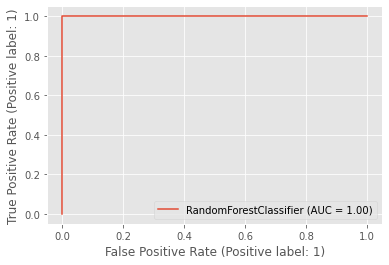

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
rf = plot_roc_curve(cla, X_test, y_test)
plt.show()

### Graph the feature importance on the RandomForest Classifier

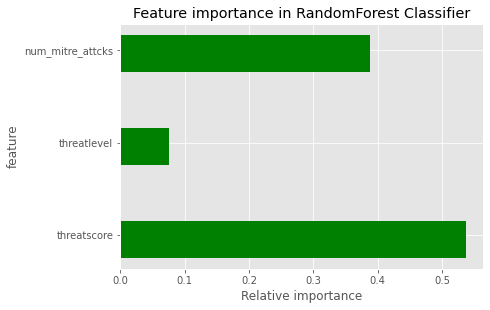

<Figure size 360x360 with 0 Axes>

In [33]:
fn=['threatscore', 'threatlevel', 'num_mitre_attcks']

y = cla.feature_importances_
fig, ax = plt.subplots() 
width = 0.4 
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(fn, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, y_pred)

array([[36,  0],
       [ 0,  3]])

In [36]:
#false negative rate
2/44

0.045454545454545456

In [37]:
#accuracyS
47/50

0.94

In [38]:
import shap
shap.initjs()

import matplotlib.pyplot as plt
import numpy as np

from alibi.explainers import KernelShap
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [41]:
explainer = shap.TreeExplainer(cla)

## Calculate Shap values

### First test on training data

In [52]:
choosen_instance = X_train
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

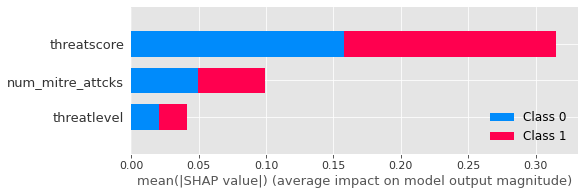

In [53]:
shap.summary_plot(shap_values, X_train)

### Not on test data

In [48]:
choosen_instance = X_test
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

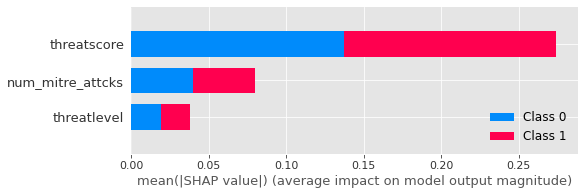

In [46]:
shap.summary_plot(shap_values, X_test)